In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!wget https://data.mendeley.com/public-files/datasets/vfszbj9b36/files/f0de314f-ea72-4385-9faa-f06593bb0a2d/file_downloaded -O phishing_mendeley.csv

--2025-07-15 09:35:49--  https://data.mendeley.com/public-files/datasets/vfszbj9b36/files/f0de314f-ea72-4385-9faa-f06593bb0a2d/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/36a86805-c82f-4c8a-ae1b-f4288ddba85d [following]
--2025-07-15 09:35:50--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/36a86805-c82f-4c8a-ae1b-f4288ddba85d
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 52.218.40.80, 3.5.65.134, 52.218.96.83, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|52.218.40.80|:443..

In [3]:
!wget https://data.mendeley.com/public-files/datasets/vfszbj9b36/files/97e4b9fc-8c55-4579-ae80-d30740d00913/file_downloaded -O phishing_mendeley_2.csv

--2025-07-15 09:35:52--  https://data.mendeley.com/public-files/datasets/vfszbj9b36/files/97e4b9fc-8c55-4579-ae80-d30740d00913/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/82bd98f3-d2d7-42fa-bf80-e1e04bcd054d [following]
--2025-07-15 09:35:53--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/82bd98f3-d2d7-42fa-bf80-e1e04bcd054d
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 3.5.72.193, 52.218.92.232, 3.5.70.76, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|3.5.72.193|:443... co

In [4]:
main = pd.read_csv('/kaggle/working/phishing_mendeley.csv')
phishing = pd.read_csv('/kaggle/working/phishing_mendeley_2.csv')

In [5]:
main.head()

,url,type
0,https://www.google.com,legitimate
1,https://www.youtube.com,legitimate
2,https://www.facebook.com,legitimate
3,https://www.baidu.com,legitimate
4,https://www.wikipedia.org,legitimate


In [6]:
phishing.head()

,url,Type
0,https://docs.google.com/presentation/d/e/2PACX...,Phishing
1,https://btttelecommunniccatiion.weeblysite.com/,Phishing
2,https://kq0hgp.webwave.dev/,Phishing
3,https://brittishtele1bt-69836.getresponsesite....,Phishing
4,https://bt-internet-105056.weeblysite.com/,Phishing


In [7]:
main.columns

Index(['url', 'type'], dtype='object')

In [8]:
phishing.columns

Index(['url', 'Type'], dtype='object')

In [9]:
phishing_renamed = phishing.rename(columns={'Type': 'type'})

In [10]:
data = pd.concat([main, phishing_renamed], ignore_index=True)

In [11]:
data.head()

,url,type
0,https://www.google.com,legitimate
1,https://www.youtube.com,legitimate
2,https://www.facebook.com,legitimate
3,https://www.baidu.com,legitimate
4,https://www.wikipedia.org,legitimate


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504983 entries, 0 to 504982
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     504983 non-null  object
 1   type    504983 non-null  object
dtypes: object(2)
memory usage: 7.7+ MB


In [13]:
data['type'].value_counts()

type
legitimate    345738
phishing      104438
Phishing       54807
Name: count, dtype: int64

In [14]:
# Option 1: Convert all to lowercase
data['type'] = data['type'].str.lower()
print(data['type'].value_counts())

type
legitimate    345738
phishing      159245
Name: count, dtype: int64


In [15]:
print(data['type'].value_counts(normalize=True) * 100)

type
legitimate    68.465275
phishing      31.534725
Name: proportion, dtype: float64


In [16]:
data.isna().sum()

url     0
type    0
dtype: int64

In [17]:
data = data.dropna(subset=['url'])

In [18]:
data['url'].nunique()

504933

In [19]:
data = data.drop_duplicates(subset=['url'], keep='first')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504933 entries, 0 to 504981
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     504933 non-null  object
 1   type    504933 non-null  object
dtypes: object(2)
memory usage: 11.6+ MB


In [21]:
data.describe()

,url,type
count,504933,504933
unique,504933,2
top,https://www.google.com,legitimate
freq,1,345738


In [22]:
# 1. Look at URL length distribution
url_lengths = data['url'].str.len()
print(f"URL Length Stats:")
print(f"Min: {url_lengths.min()}")
print(f"Max: {url_lengths.max()}")
print(f"Average: {url_lengths.mean():.1f}")
print(f"Median: {url_lengths.median():.1f}")

# 2. Sample some URLs to understand the data better
print("\nSample legitimate URLs:")
print(data[data['type'] == 'legitimate']['url'].sample(5).tolist())
print("\nSample phishing URLs:")
print(data[data['type'] == 'phishing']['url'].sample(5).tolist())

URL Length Stats:
Min: 8
Max: 25523
Average: 60.9
Median: 52.0

Sample legitimate URLs:
['https://www.abbotthouse.net/ns/?page_id=2', 'https://www.warnerbros.it/', 'https://www.thefreedictionary.com/privately+held+corporation', 'https://www.mexicoask.com/', 'https://www.bwrc.eecs.berkeley.edu/']

Sample phishing URLs:
['http://b2b.palbeck.de/skin/Gdoccc/', 'http://bitracons.be/cache', 'http://blitz174.ru/system/smsgate/7623dh3f.exe?.7055475', 'http://www.savision.in/Dova1/', 'http://lmcreativedesign.com.br/owow/docsign/6126d61599f1bd557050caf1ac6ebb54']


In [23]:
from urllib.parse import urlparse
import re

def extract_url_features(df):
    """Extract optimized features from URLs for phishing detection"""
    
    def calculate_entropy(s):
        if not s or len(s) == 0:
            return 0
        prob = [float(s.count(c)) / len(s) for c in dict.fromkeys(list(s))]
        return -sum([p * np.log2(p) for p in prob if p > 0])
    
    def safe_urlparse(url):
        try:
            return urlparse(url)
        except:
            return urlparse('')
    
    def has_valid_port(url):
        try:
            return bool(safe_urlparse(url).port)
        except ValueError:
            return False

    # Key length features (log-normalized for better distribution)
    df['url_length'] = df['url'].str.len()
    df['domain_length'] = df['url'].apply(lambda x: len(safe_urlparse(x).netloc))
    df['url_length_norm'] = np.log1p(df['url_length'])
    df['domain_length_norm'] = np.log1p(df['domain_length'])
    
    # Entropy features (strong predictors)
    df['url_entropy'] = df['url'].apply(calculate_entropy)
    df['domain_entropy'] = df['url'].apply(lambda x: calculate_entropy(safe_urlparse(x).netloc))
    
    # Key character analysis
    df['num_dots'] = df['url'].str.count('\.')
    df['num_hyphens'] = df['url'].str.count('-')
    df['num_digits'] = df['url'].str.count(r'\d')
    df['num_subdomains'] = df['url'].apply(lambda x: max(0, len(safe_urlparse(x).netloc.split('.')) - 2))
    
    # Ratios (better than raw counts)
    df['dot_ratio'] = df['num_dots'] / (df['url_length'] + 1)
    df['hyphen_ratio'] = df['num_hyphens'] / (df['url_length'] + 1)
    df['digit_ratio'] = df['num_digits'] / (df['url_length'] + 1)
    df['subdomain_ratio'] = df['num_subdomains'] / (df['domain_length'] + 1)
    
    # Protocol analysis
    df['protocol'] = df['url'].apply(lambda x: safe_urlparse(x).scheme.lower())
    df['is_https'] = (df['protocol'] == 'https').astype(int)
    df['has_unusual_protocol'] = (~df['protocol'].isin(['http', 'https', ''])).astype(int)
    
    # High-impact security indicators
    df['has_ip'] = df['url'].str.contains(r'\b(?:\d{1,3}\.){3}\d{1,3}\b', na=False).astype(int)
    df['has_suspicious_port'] = df['url'].str.contains(r':(?!80|443|8080|8443)\d+', na=False).astype(int)
    df['has_at_symbol'] = df['url'].str.contains('@', na=False).astype(int)
    df['has_double_slash'] = df['url'].str.contains('//(?!http)', na=False).astype(int)
    df['has_url_encoding'] = df['url'].str.contains(r'%[0-9a-fA-F]{2}', na=False).astype(int)
    
    # Path analysis
    df['path_length'] = df['url'].apply(lambda x: len(safe_urlparse(x).path))
    df['path_depth'] = df['url'].apply(lambda x: safe_urlparse(x).path.count('/'))
    df['path_length_ratio'] = df['path_length'] / (df['url_length'] + 1)
    
    # Query parameters
    df['has_query'] = df['url'].apply(lambda x: bool(safe_urlparse(x).query)).astype(int)
    df['query_length'] = df['url'].apply(lambda x: len(safe_urlparse(x).query))
    df['query_length_ratio'] = df['query_length'] / (df['url_length'] + 1)
    
    # Domain structure
    df['domain_tokens'] = df['url'].apply(lambda x: len(safe_urlparse(x).netloc.split('.')))
    df['has_www'] = df['url'].str.contains(r'//www\.', na=False).astype(int)
    df['many_subdomains'] = (df['num_subdomains'] > 3).astype(int)
    
    # Suspicious keywords (as requested to keep)
    high_risk_keywords = ['login', 'signin', 'account', 'verification', 'verify', 'secure', 'security',
                          'update', 'urgent', 'suspended', 'limited', 'expired', 'confirm', 'activate']
    brand_keywords = ['banking', 'paypal', 'amazon', 'microsoft', 'google', 'apple', 'facebook']
    bait_keywords = ['free', 'prize', 'winner', 'click', 'here', 'now', 'download']
    
    df['has_high_risk_keywords'] = df['url'].str.contains(r'\b(?:' + '|'.join(high_risk_keywords) + r')\b',
                                                           case=False, na=False).astype(int)
    df['has_brand_keywords'] = df['url'].str.contains(r'\b(?:' + '|'.join(brand_keywords) + r')\b',
                                                       case=False, na=False).astype(int)
    df['has_bait_keywords'] = df['url'].str.contains(r'\b(?:' + '|'.join(bait_keywords) + r')\b',
                                                      case=False, na=False).astype(int)
    
    # TLD analysis
    suspicious_tlds = ['tk', 'ml', 'ga', 'cf', 'bit', 'pw', 'top', 'click', 'download', 'work']
    df['has_suspicious_tld'] = df['url'].str.contains(r'\.(?:' + '|'.join(suspicious_tlds) + r')(?:/|$)',
                                                      case=False, na=False).astype(int)
    
    # Length categorization
    df['is_very_long_url'] = (df['url_length'] > 150).astype(int)
    df['is_very_short_url'] = (df['url_length'] < 20).astype(int)
    
    # Randomness and structure indicators
    df['has_random_string'] = df['url'].str.contains(r'[a-zA-Z0-9]{12,}', na=False).astype(int)
    df['consonant_ratio'] = df['url'].str.count(r'[bcdfghjklmnpqrstvwxyzBCDFGHJKLMNPQRSTVWXYZ]') / (df['url_length'] + 1)
    df['has_numeric_subdomain'] = df['url'].str.contains(r'://\d+\.', na=False).astype(int)
    
    # Simple counts without domain knowledge weights
    df['security_risk_count'] = (
        df['has_ip'] + df['has_suspicious_port'] + df['has_at_symbol'] + 
        df['has_double_slash'] + df['has_url_encoding'] + df['has_unusual_protocol']
    )
    
    df['content_risk_count'] = (
        df['has_high_risk_keywords'] + df['has_brand_keywords'] + df['has_bait_keywords']
    )
    
    df['structure_risk_count'] = (
        df['has_suspicious_tld'] + df['many_subdomains'] + df['is_very_long_url'] + 
        df['has_random_string'] + df['has_numeric_subdomain']
    )
    
    # Total risk count
    df['total_risk_count'] = df['security_risk_count'] + df['content_risk_count'] + df['structure_risk_count']
    
    # Remove redundant raw features to reduce multicollinearity
    features_to_drop = ['url_length', 'domain_length', 'path_length', 'query_length',
                       'num_dots', 'num_hyphens', 'num_digits', 'num_subdomains', 'protocol']
    df = df.drop(columns=features_to_drop, errors='ignore')
    
    return df

In [24]:
data_with_features = extract_url_features(data.copy())

In [25]:
data_with_features.head()

,url,type,url_length_norm,domain_length_norm,url_entropy,domain_entropy,dot_ratio,hyphen_ratio,digit_ratio,subdomain_ratio,...,has_suspicious_tld,is_very_long_url,is_very_short_url,has_random_string,consonant_ratio,has_numeric_subdomain,security_risk_count,content_risk_count,structure_risk_count,total_risk_count
0,https://www.google.com,legitimate,3.135494,2.708050,3.663533,2.842371,0.086957,0.0,0.0,0.066667,...,0,0,0,0,0.565217,0,1,1,0,2
1,https://www.youtube.com,legitimate,3.178054,2.772589,3.762267,3.189898,0.083333,0.0,0.0,0.062500,...,0,0,0,0,0.541667,0,1,0,0,1
2,https://www.facebook.com,legitimate,3.218876,2.833213,3.855389,3.155639,0.080000,0.0,0.0,0.058824,...,0,0,0,0,0.560000,0,1,1,0,2
3,https://www.baidu.com,legitimate,3.091042,2.639057,3.880180,3.180833,0.090909,0.0,0.0,0.071429,...,0,0,0,0,0.545455,0,1,0,0,1
4,https://www.wikipedia.org,legitimate,3.258097,2.890372,3.813661,3.219528,0.076923,0.0,0.0,0.055556,...,0,0,0,0,0.538462,0,1,0,0,1


In [26]:
data_with_features.describe()

,url_length_norm,domain_length_norm,url_entropy,domain_entropy,dot_ratio,hyphen_ratio,digit_ratio,subdomain_ratio,is_https,has_unusual_protocol,...,has_suspicious_tld,is_very_long_url,is_very_short_url,has_random_string,consonant_ratio,has_numeric_subdomain,security_risk_count,content_risk_count,structure_risk_count,total_risk_count
count,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000,...,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000,504933.000000
mean,4.002852,2.985087,4.322615,3.403672,0.048161,0.015159,0.057963,0.053442,0.794622,0.000085,...,0.006842,0.025970,0.004904,0.429366,0.533645,0.009528,1.045155,0.084795,0.475425,1.605375
std,0.461974,0.334868,0.352309,0.374194,0.020071,0.024913,0.081601,0.030021,0.403978,0.009228,...,0.082436,0.159045,0.069854,0.494986,0.067511,0.097145,0.221926,0.291317,0.559253,0.731818
min,2.197225,0.000000,1.339504,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.688879,2.772589,4.098069,3.182006,0.034091,0.000000,0.000000,0.040000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,3.970292,2.995732,4.296439,3.408053,0.046512,0.000000,0.021277,0.055556,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.540541,0.000000,1.000000,0.000000,0.000000,1.000000
75%,4.276666,3.178054,4.531693,3.652131,0.060000,0.022727,0.092308,0.066667,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.578947,0.000000,1.000000,0.000000,1.000000,2.000000
max,10.147374,5.484797,6.048781,5.070529,0.216216,0.341667,0.808974,0.250000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.872928,1.000000,4.000000,3.000000,3.000000,9.000000


In [27]:
data_with_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504933 entries, 0 to 504981
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   url                     504933 non-null  object 
 1   type                    504933 non-null  object 
 2   url_length_norm         504933 non-null  float64
 3   domain_length_norm      504933 non-null  float64
 4   url_entropy             504933 non-null  float64
 5   domain_entropy          504933 non-null  float64
 6   dot_ratio               504933 non-null  float64
 7   hyphen_ratio            504933 non-null  float64
 8   digit_ratio             504933 non-null  float64
 9   subdomain_ratio         504933 non-null  float64
 10  is_https                504933 non-null  int64  
 11  has_unusual_protocol    504933 non-null  int64  
 12  has_ip                  504933 non-null  int64  
 13  has_suspicious_port     504933 non-null  int64  
 14  has_at_symbol           5

In [28]:
data_with_features.isna().sum()

url                       0
type                      0
url_length_norm           0
domain_length_norm        0
url_entropy               0
domain_entropy            0
dot_ratio                 0
hyphen_ratio              0
digit_ratio               0
subdomain_ratio           0
is_https                  0
has_unusual_protocol      0
has_ip                    0
has_suspicious_port       0
has_at_symbol             0
has_double_slash          0
has_url_encoding          0
path_depth                0
path_length_ratio         0
has_query                 0
query_length_ratio        0
domain_tokens             0
has_www                   0
many_subdomains           0
has_high_risk_keywords    0
has_brand_keywords        0
has_bait_keywords         0
has_suspicious_tld        0
is_very_long_url          0
is_very_short_url         0
has_random_string         0
consonant_ratio           0
has_numeric_subdomain     0
security_risk_count       0
content_risk_count        0
structure_risk_count

In [29]:
data_with_features.dropna()

,url,type,url_length_norm,domain_length_norm,url_entropy,domain_entropy,dot_ratio,hyphen_ratio,digit_ratio,subdomain_ratio,...,has_suspicious_tld,is_very_long_url,is_very_short_url,has_random_string,consonant_ratio,has_numeric_subdomain,security_risk_count,content_risk_count,structure_risk_count,total_risk_count
0,https://www.google.com,legitimate,3.135494,2.708050,3.663533,2.842371,0.086957,0.000000,0.000000,0.066667,...,0,0,0,0,0.565217,0,1,1,0,2
1,https://www.youtube.com,legitimate,3.178054,2.772589,3.762267,3.189898,0.083333,0.000000,0.000000,0.062500,...,0,0,0,0,0.541667,0,1,0,0,1
2,https://www.facebook.com,legitimate,3.218876,2.833213,3.855389,3.155639,0.080000,0.000000,0.000000,0.058824,...,0,0,0,0,0.560000,0,1,1,0,2
3,https://www.baidu.com,legitimate,3.091042,2.639057,3.880180,3.180833,0.090909,0.000000,0.000000,0.071429,...,0,0,0,0,0.545455,0,1,0,0,1
4,https://www.wikipedia.org,legitimate,3.258097,2.890372,3.813661,3.219528,0.076923,0.000000,0.000000,0.055556,...,0,0,0,0,0.538462,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504964,http://www.balajigloves.net/js/attiinnddeexxxb...,phishing,3.970292,3.044522,4.245656,3.684184,0.056604,0.000000,0.000000,0.047619,...,0,0,0,1,0.603774,0,1,0,1,2
504967,http://lookatmynewphotos.com/,phishing,3.401197,3.091042,3.810928,3.649001,0.033333,0.000000,0.000000,0.000000,...,0,0,0,1,0.566667,0,1,0,1,2
504971,https://www.markdbeats.com/wp-content/plugins/...,phishing,3.970292,2.944439,4.324944,3.572431,0.037736,0.018868,0.018868,0.052632,...,0,0,0,0,0.584906,0,1,0,0,1
504977,http://webmailadmin0.myfreesites.net/,phishing,3.637586,3.401197,4.077715,3.784898,0.052632,0.000000,0.026316,0.033333,...,0,0,0,1,0.526316,0,1,0,1,2


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


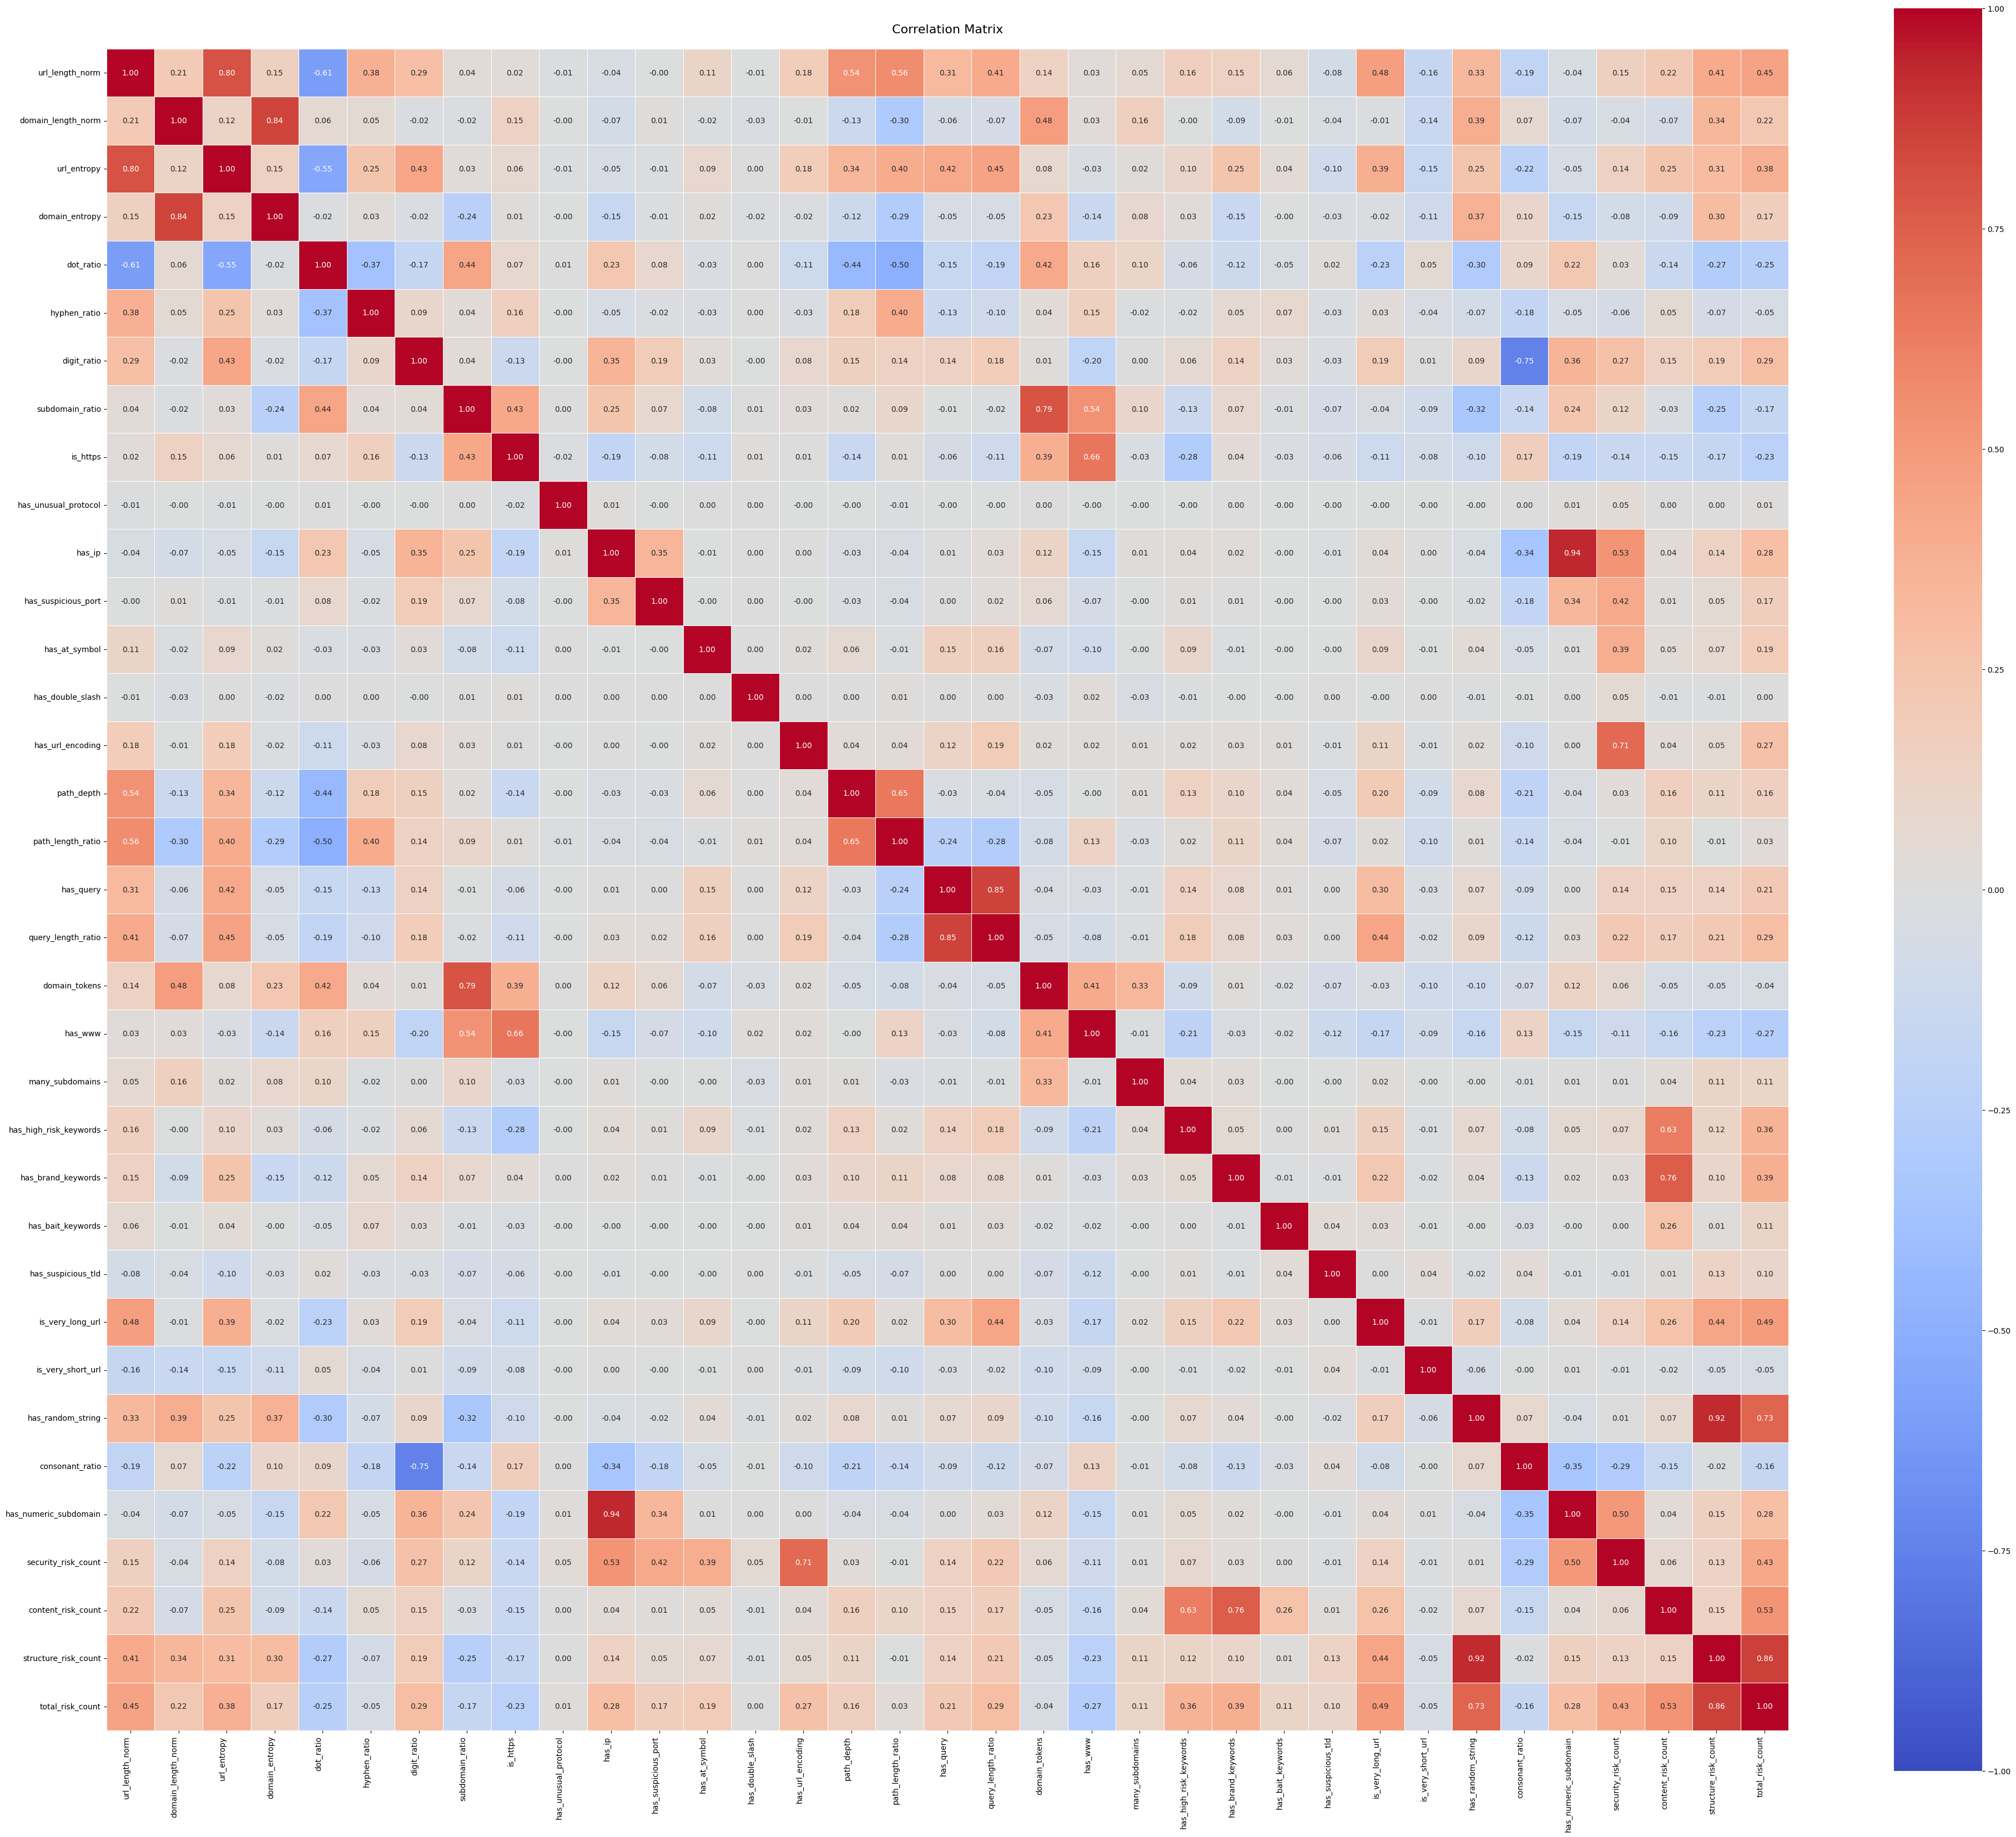

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = data_with_features.drop(columns=['url', 'type'])
corr = numeric_df.corr()

plt.figure(figsize=(40,40))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    vmin=-1,
    vmax=1
)
plt.title('Correlation Matrix', fontsize=16, pad=20)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [31]:
data_with_features.head()

,url,type,url_length_norm,domain_length_norm,url_entropy,domain_entropy,dot_ratio,hyphen_ratio,digit_ratio,subdomain_ratio,...,has_suspicious_tld,is_very_long_url,is_very_short_url,has_random_string,consonant_ratio,has_numeric_subdomain,security_risk_count,content_risk_count,structure_risk_count,total_risk_count
0,https://www.google.com,legitimate,3.135494,2.708050,3.663533,2.842371,0.086957,0.0,0.0,0.066667,...,0,0,0,0,0.565217,0,1,1,0,2
1,https://www.youtube.com,legitimate,3.178054,2.772589,3.762267,3.189898,0.083333,0.0,0.0,0.062500,...,0,0,0,0,0.541667,0,1,0,0,1
2,https://www.facebook.com,legitimate,3.218876,2.833213,3.855389,3.155639,0.080000,0.0,0.0,0.058824,...,0,0,0,0,0.560000,0,1,1,0,2
3,https://www.baidu.com,legitimate,3.091042,2.639057,3.880180,3.180833,0.090909,0.0,0.0,0.071429,...,0,0,0,0,0.545455,0,1,0,0,1
4,https://www.wikipedia.org,legitimate,3.258097,2.890372,3.813661,3.219528,0.076923,0.0,0.0,0.055556,...,0,0,0,0,0.538462,0,1,0,0,1


In [32]:
data_with_features.columns

Index(['url', 'type', 'url_length_norm', 'domain_length_norm', 'url_entropy',
       'domain_entropy', 'dot_ratio', 'hyphen_ratio', 'digit_ratio',
       'subdomain_ratio', 'is_https', 'has_unusual_protocol', 'has_ip',
       'has_suspicious_port', 'has_at_symbol', 'has_double_slash',
       'has_url_encoding', 'path_depth', 'path_length_ratio', 'has_query',
       'query_length_ratio', 'domain_tokens', 'has_www', 'many_subdomains',
       'has_high_risk_keywords', 'has_brand_keywords', 'has_bait_keywords',
       'has_suspicious_tld', 'is_very_long_url', 'is_very_short_url',
       'has_random_string', 'consonant_ratio', 'has_numeric_subdomain',
       'security_risk_count', 'content_risk_count', 'structure_risk_count',
       'total_risk_count'],
      dtype='object')

In [33]:
features = [
    'url_entropy',              # Top predictor - randomness in URLs
    'domain_entropy',           # Domain randomness patterns
    'has_ip',                   # Direct IP instead of domain - major red flag
    'has_suspicious_tld',       # Free/suspicious TLDs (.tk, .ml, .ga)
    'has_high_risk_keywords',   # "login", "verify", "urgent", etc.
    'total_risk_count',         # Aggregate risk score
    'url_length_norm',          # Unusually long URLs
    'subdomain_ratio',          # Excessive subdomains
    'has_at_symbol',            # @ symbol for redirection
    'has_brand_keywords',       # Brand impersonation attempts
    'path_depth',               # Deep directory structures
    'has_url_encoding'          # URL encoding obfuscation
]

In [34]:
print(data_with_features.columns.tolist())


['url', 'type', 'url_length_norm', 'domain_length_norm', 'url_entropy', 'domain_entropy', 'dot_ratio', 'hyphen_ratio', 'digit_ratio', 'subdomain_ratio', 'is_https', 'has_unusual_protocol', 'has_ip', 'has_suspicious_port', 'has_at_symbol', 'has_double_slash', 'has_url_encoding', 'path_depth', 'path_length_ratio', 'has_query', 'query_length_ratio', 'domain_tokens', 'has_www', 'many_subdomains', 'has_high_risk_keywords', 'has_brand_keywords', 'has_bait_keywords', 'has_suspicious_tld', 'is_very_long_url', 'is_very_short_url', 'has_random_string', 'consonant_ratio', 'has_numeric_subdomain', 'security_risk_count', 'content_risk_count', 'structure_risk_count', 'total_risk_count']


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_with_features[features],
    data_with_features['type'].map({'phishing': 1, 'legitimate': 0}),
    test_size=0.2,
    random_state=42,
    stratify=data_with_features['type']
)


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=2000)

In [38]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)

In [39]:
y_pred_log = log_model.predict(X_test_scaled)

In [40]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

Accuracy: 0.8119
F1-Score: 0.7244

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.86     69148
           1       0.67      0.78      0.72     31839

    accuracy                           0.81    100987
   macro avg       0.78      0.80      0.79    100987
weighted avg       0.82      0.81      0.82    100987

